# Data Cleaning

After scraping +3,000 Craigslist posts into a dataframe, it's time to clean the data and organize amenities and neighborhoods into useable values for the regression model. 

## Import Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
%matplotlib inline

In [2]:
sf_raw = pd.read_csv('data_files/raw_sf_scrape.csv')

In [3]:
sf_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3093 non-null   object 
 1   title      3093 non-null   object 
 2   link       3093 non-null   object 
 3   price      3093 non-null   int64  
 4   brs        2476 non-null   float64
 5   sqft       1461 non-null   float64
 6   hood       3062 non-null   object 
 7   bath       3042 non-null   object 
 8   amenities  3093 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 217.6+ KB


In [4]:
sf_raw.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3850,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [5]:
sf_raw.tail()

,date,title,link,price,brs,sqft,hood,bath,amenities
3088,Sep 30,1 Month Free Rent: Massive Modern Luxury Studio,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,1948,NaN,500.0,SOMA / south beach,1Ba,['application fee details: $30 application fee...
3089,Sep 30,1 Month Free Rent: Massive Modern Luxury Studio,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,1948,NaN,500.0,downtown / civic / van ness,1Ba,['application fee details: $30 application fee...
3090,Sep 30,"Large, Beautiful Classic Victorian 1bd/1ba",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3395,1.0,800.0,laurel hts / presidio,1Ba,"['apartment', 'laundry in bldg']"
3091,Sep 30,3 bedroom in Nopa with Private Deck (Top Floor),https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,3.0,1500.0,alamo square / nopa,2Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
3092,Sep 30,Private 1 bed/1 bath/1 kitchen in-law unit ava...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,1795,1.0,300.0,ingleside / SFSU / CCSF,1Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."


In [6]:
len(sf_raw)

3093

## Dealing with duplicate listings

Users have the option of posting the same listing multiple times to keep the date more current for apartment hunters to find. The URL changes, but everything ele is the same. 

By dropping the posting date and URL coluns, I can easily identify duplicate rows to drop. 

In [7]:
sf = sf_raw.drop(['date', 'link'], axis=1)

In [8]:
sf.head()

,title,price,brs,sqft,hood,bath,amenities
0,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",3850,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Beautiful house for rent,900,1.0,NaN,portola district,0Ba,['house']
2,4 BEDROOM APARTMENT IN THE HAIGHT,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,4 BEDROOM APARTMENT IN THE HAIGHT,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,ENJOY GOLDEN GATE PARK EVERYDAY,2800,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [9]:
sf.sort_values('title', inplace=True)

In [10]:
sf.head(3)

,title,price,brs,sqft,hood,bath,amenities
2240,"""INCENTIVE"" 2 BR + Bonus Room(Office/Den) - DU...",3400,2.0,NaN,castro / upper market,1Ba,"['application fee details: $30 Per Applicant',..."
2243,"""INCENTIVE"" 2 BR + Bonus Room(Office/Den) - DU...",3400,2.0,NaN,castro / upper market,1Ba,"['application fee details: $30 Per Applicant',..."
2245,"""INCENTIVE"" IN THE HEART OF THE DUBOCE TRIANGLE",3700,3.0,NaN,castro / upper market,1Ba,"['application fee details: $30 Per Applicant',..."


In [11]:
sf.drop_duplicates(keep=False, inplace=True)

In [12]:
sf.head()

,title,price,brs,sqft,hood,bath,amenities
2245,"""INCENTIVE"" IN THE HEART OF THE DUBOCE TRIANGLE",3700,3.0,NaN,castro / upper market,1Ba,"['application fee details: $30 Per Applicant',..."
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,2.0,1600.0,pacific heights,2Ba,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,1.0,550.0,pacific heights,1Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,2.0,1300.0,marina / cow hollow,1Ba,"['EV charging', 'cats are OK - purrr', 'dogs a..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3.0,3500.0,pacific heights,2.5Ba,"['furnished', 'apartment', 'w/d in unit', 'no ..."


In [13]:
len(sf)

2461

## Cleaning Bathrooms


My scrape returned string values for the bathroom fields. Here I'll remove the 'Ba' suffix and also deal with two non-numerical values: `SharedBa` and `splitBa`.

In [14]:
sf.bath.unique()

array(['1Ba', '2Ba', '2.5Ba', nan, '3.5Ba', 'sharedBa', '0Ba', '3Ba',
       '1.5Ba', 'splitBa', '4Ba', '5.5Ba', '4.5Ba'], dtype=object)

What does `sharedBa` mean? 

In [15]:
shared_baths = sf_raw[(sf_raw.bath == 'sharedBa')]

shared_baths_links = list(shared_baths.link)

In [16]:
# number of listings with shared bath
len(shared_baths)

15

In [17]:
# Investigating a few links
for link in shared_baths_links[:5]:
    print(link)
    print("")

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-spoons-when-all-you-need/7206516011.html

https://sfbay.craigslist.org/sfc/apa/d/excelente-oportunidad-centrico-sf/7206512351.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-fabulous-mission-studio/7200480477.html

https://sfbay.craigslist.org/sfc/apa/d/1400-private-rm-not-share-for-rent/7205302134.html

https://sfbay.craigslist.org/sfc/apa/d/best-room-rate-in-north-beach/7203890620.html



After viewing several posts, listings with `sharedBa` are not full apartment/housing options -- they are a shared living arrangement and should be dropped.

In [18]:
sf = sf[sf.bath != 'sharedBa']

In [19]:
sf.bath.unique()

array(['1Ba', '2Ba', '2.5Ba', nan, '3.5Ba', '0Ba', '3Ba', '1.5Ba',
       'splitBa', '4Ba', '5.5Ba', '4.5Ba'], dtype=object)

Next - `splitBa` values. 

After reviewing a few links, it looks like `splitBa` means it has a private bathroom, but the sink and toilet/shower are just separate -- these will be converted to 1.

In [20]:
sf['bath'] = sf['bath'].replace('splitBa', '1Ba')

In [21]:
sf.bath.unique()

array(['1Ba', '2Ba', '2.5Ba', nan, '3.5Ba', '0Ba', '3Ba', '1.5Ba', '4Ba',
       '5.5Ba', '4.5Ba'], dtype=object)

What about `nan` and `0Ba`? 

In [22]:
missing_bath_info = sf_raw[(sf_raw.bath == np.nan) | 
                          (sf_raw.bath == '0Ba')]

len(missing_bath_info)

9

In [23]:
for link in missing_bath_info.link:
    print(link)
    print('')

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-beautiful-house-for-rent/7206621152.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-sunny-victorian-flat/7206563979.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-two-bedroom-1200-sq-ft/7206561289.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-airy-bright-marina-1br/7206542254.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-7th-floor-corner-jr-1-bd/7191572212.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-2847-turk-street-san/7201729219.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-live-work-space-in-modern/7197876630.html

https://sfbay.craigslist.org/sfc/apa/d/huge-1-bed-hardwood-gas-eat-in-kit/7206260644.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-bed-1bathh-wd-free/7206132572.html



These all have 1 bathroom -- the poster just didn't bother specifying. These values will also be converted to 1.

In [24]:
sf['bath'] = sf['bath'].replace(np.nan, '1Ba')
sf['bath'] = sf['bath'].replace('0Ba', '1Ba')

In [25]:
sf.bath.unique()

array(['1Ba', '2Ba', '2.5Ba', '3.5Ba', '3Ba', '1.5Ba', '4Ba', '5.5Ba',
       '4.5Ba'], dtype=object)

Now to take care of the 'Ba' suffix and convert everything to a float

In [26]:
sf['bath'] = sf['bath'].str.replace('Ba', '').astype(float)

In [27]:
sf.head()

,title,price,brs,sqft,hood,bath,amenities
2245,"""INCENTIVE"" IN THE HEART OF THE DUBOCE TRIANGLE",3700,3.0,NaN,castro / upper market,1.0,"['application fee details: $30 Per Applicant',..."
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,2.0,1600.0,pacific heights,2.0,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,1.0,550.0,pacific heights,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,2.0,1300.0,marina / cow hollow,1.0,"['EV charging', 'cats are OK - purrr', 'dogs a..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3.0,3500.0,pacific heights,2.5,"['furnished', 'apartment', 'w/d in unit', 'no ..."


Clean bathrooms!

## Dealing with missing square footage

Square footage is likely to be an important feature in determining rent price. Currently it's the column with the most missing values. I'll simply create a new version of `sf` dataframe where there are no missing values for `sqft`. 

In [28]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 2245 to 2495
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      2448 non-null   object 
 1   price      2448 non-null   int64  
 2   brs        1953 non-null   float64
 3   sqft       1122 non-null   float64
 4   hood       2423 non-null   object 
 5   bath       2448 non-null   float64
 6   amenities  2448 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 153.0+ KB


In [29]:
sf = sf[sf['sqft'].notna()]

In [30]:
sf.head()

,title,price,brs,sqft,hood,bath,amenities
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,2.0,1600.0,pacific heights,2.0,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,1.0,550.0,pacific heights,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,2.0,1300.0,marina / cow hollow,1.0,"['EV charging', 'cats are OK - purrr', 'dogs a..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3.0,3500.0,pacific heights,2.5,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,1.0,561.0,marina / cow hollow,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',..."


In [31]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 1980 to 225
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1122 non-null   object 
 1   price      1122 non-null   int64  
 2   brs        942 non-null    float64
 3   sqft       1122 non-null   float64
 4   hood       1101 non-null   object 
 5   bath       1122 non-null   float64
 6   amenities  1122 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 70.1+ KB


Great! Now bedrooms is the limiting feature. Let's see if I can boost that number a little higher.

## Cleaning Bedrooms

In [32]:
sf.brs.unique()

array([ 2.,  1.,  3.,  4., nan,  5.,  6.])

In [33]:
len(sf.brs.unique())

7

How many nan value? 

In [34]:
missing_brs = sf[sf.brs.isnull()]

In [35]:
missing_brs.head(3)

,title,price,brs,sqft,hood,bath,amenities
2276,#LiveTuring Fantastic Studios! 8 Weeks Free! T...,2495,NaN,563.0,NaN,1.0,['apartment']
2419,***LIKE NEW STUDIO that feels like 1 Bedroom A...,1880,NaN,350.0,SOMA / south beach,1.0,"['application fee details: $20', 'apartment', ..."
795,**8 Weeks Free** Studio Apartment at 923 Folsom,2705,NaN,509.0,SOMA / south beach,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',..."


In [36]:
print("Number of missing bedroom rows: ", len(missing_brs))

Number of missing bedroom rows:  180


What are these nan values? Need to take a look at a few links to see what's happening.

In [37]:
br_nans = sf_raw[sf_raw['brs'].isnull()]

br_nan_links = list(br_nans.link)

In [38]:
for link in br_nan_links[:5]:
    print(link)
    print('')

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-huge-newly-remodeled/7206619643.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-cozy-edwardian-apartment/7194887293.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-fifth-floor-studio-in/7206615888.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-second-floor-studio/7202953088.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-1bd-1bath-california/7200175190.html



In [39]:
for link in br_nan_links[9:15]:
    print(link)
    print('')

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-wow-prices-you-cant-beat/7206609316.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-2-months-free-newly/7206609071.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-nob-hill-efficiency/7205168796.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-always-fresh-forever/7206603015.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-two-months-free-studio-in/7206586455.html

https://sfbay.craigslist.org/sfc/apa/d/san-francisco-available-now-4-bedroom-2/7200487016.html



It seems like a mix -- some are studios, some have 1 or more bedrooms. The key is in the title. So I'll try to parse through the title and if it contains and key words that I can fill in.

In [40]:
# Function to fill missing bedroom information
# by parsing through titles for key words: 

def replace_missing_brs(post_title):
    if 'studio' in post_title.lower():
        return 0
    elif '1br' in post_title.lower().replace(' ', ''):
        return 1
    elif '1bed' in post_title.lower().replace(' ', ''):
        return 1
    elif 'onebed' in post_title.lower().replace(' ', ''):
        return 1
    elif '2br' in post_title.lower().replace(' ', ''):
        return 2
    elif '3br' in post_title.lower().replace(' ', ''):
        return 3
    elif '4br' in post_title.lower().replace(' ', ''):
        return 4
    elif '4bd' in post_title.lower().replace(' ', ''):
        return 4
    elif '4bed' in post_title.lower().replace(' ', ''):
        return 4
    else:
        pass

In [41]:
sf['brs'] = sf['brs'].fillna('missing')

In [42]:
sf['beds'] = sf.apply(
    lambda row: replace_missing_brs(row['title']) if row['brs'] == 'missing' else row['brs'], axis=1)

In [43]:
sf.head()

,title,price,brs,sqft,hood,bath,amenities,beds
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,2,1600.0,pacific heights,2.0,"['furnished', 'apartment', 'w/d in unit', 'no ...",2.0
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,1,550.0,pacific heights,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',...",1.0
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,2,1300.0,marina / cow hollow,1.0,"['EV charging', 'cats are OK - purrr', 'dogs a...",2.0
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3,3500.0,pacific heights,2.5,"['furnished', 'apartment', 'w/d in unit', 'no ...",3.0
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,1,561.0,marina / cow hollow,1.0,"['cats are OK - purrr', 'dogs are OK - wooof',...",1.0


In [44]:
missing_brs_end = sf[sf['beds'].isnull()]

In [45]:
print("Number of missing bedrooms at start: ", len(missing_brs))
print("Number of missing bedrooms after title parse: ",len(missing_brs_end))
print("Number of recoverd bedrooms: ", len(missing_brs) - len(missing_brs_end))
print("Percent recovered: ", ((len(missing_brs) - len(missing_brs_end)) / len(missing_brs)) * 100, '%')

Number of missing bedrooms at start:  180
Number of missing bedrooms after title parse:  46
Number of recoverd bedrooms:  134
Percent recovered:  74.44444444444444 %


134 bedrooms saved, which is almost 75% of the missing data. Good enough! Now to drop everything else that's missing.

In [46]:
sf = sf[['title', 'price', 'sqft', 'beds', 'bath', 'hood', 'amenities']]

In [47]:
sf = sf[sf['beds'].notna()]

In [48]:
sf.head()

,title,price,sqft,beds,bath,hood,amenities
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,"['cats are OK - purrr', 'dogs are OK - wooof',..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,"['EV charging', 'cats are OK - purrr', 'dogs a..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,"['furnished', 'apartment', 'w/d in unit', 'no ..."
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,"['cats are OK - purrr', 'dogs are OK - wooof',..."


## Amenities

Amenities are grouped into a list in the `amenities` column. These amenities values are pre-set fields, and so the values will be standard for each listing. 

I'll create groupings for each amenity type (laundry, pets allowed, parking, etc), and create a column holding those groups for the listings amenities. 

First - I need to convert the values in the `amenities` column from a string to a list, and try parsing values through the list values. 

In [49]:
import ast

In [50]:
sf['amens_list'] = sf['amenities'].apply(lambda x: ast.literal_eval(x))

In [51]:
sf.head()

,title,price,sqft,beds,bath,hood,amenities,amens_list
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,"['furnished', 'apartment', 'w/d in unit', 'no ...","[furnished, apartment, w/d in unit, no smoking..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,"['cats are OK - purrr', 'dogs are OK - wooof',...","[cats are OK - purrr, dogs are OK - wooof, fur..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,"['EV charging', 'cats are OK - purrr', 'dogs a...","[EV charging, cats are OK - purrr, dogs are OK..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,"['furnished', 'apartment', 'w/d in unit', 'no ...","[furnished, apartment, w/d in unit, no smoking..."
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,"['cats are OK - purrr', 'dogs are OK - wooof',...","[cats are OK - purrr, dogs are OK - wooof, fur..."


In [52]:
amen_eg = sf.loc[0, 'amens_list']
amen_eg

['condo', 'w/d in unit', 'attached garage']

In [53]:
type(amen_eg)

list

In [54]:
'condo' in amen_eg

True

Looks like it worked - and now I can parse through the list to check for membership, creating columns for each type of amenity. 

In [55]:
sf = sf.drop(['amenities'], axis=1)

In [56]:
sf.head()

,title,price,sqft,beds,bath,hood,amens_list
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,"[furnished, apartment, w/d in unit, no smoking..."
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,"[cats are OK - purrr, dogs are OK - wooof, fur..."
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,"[EV charging, cats are OK - purrr, dogs are OK..."
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,"[furnished, apartment, w/d in unit, no smoking..."
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,"[cats are OK - purrr, dogs are OK - wooof, fur..."


### Laundry

Groupings

* in-unit (w/d in unit)
* on-site (laundry in bldg, laundry on site)
* n/a (w/d hookups, no laundry on site, nan)

In [57]:
def laundry_parse(amen_list):
    if 'w/d in unit' in amen_list:
        return 'in-unit'
    elif 'laundry in bldg' in amen_list:
        return 'on-site'
    elif 'laundry on site' in amen_list:
        return 'on-site'
    else:
        return 'n/a'

In [58]:
sf['laundry'] = sf['amens_list'].apply(lambda amen_list: laundry_parse(amen_list))

### Pets

Groupings
* both (dogs ok AND cats ok)
* dogs (dogs ok)
* cats (cats ok)
* no-pets (nan)

In [59]:
def pets_allowed(amen_list):
    if 'dogs are OK - wooof' in amen_list and 'cats are OK - purrr' in amen_list:
        return 'both'
    elif 'dogs are OK - wooof' in amen_list:
        return 'dogs'
    elif 'cats are OK - purrr' in amen_list:
        return 'cats'
    else:
        return 'no-pets'

In [60]:
sf['pets'] = sf['amens_list'].apply(lambda amen_list: pets_allowed(amen_list))

### Housing Type

Groupings
* multi (apartment, condo, flat, loft, manufactured, assisted living)
* double (duplex, in-law)
* single (house, townhouse, cottage/cabin)


In [61]:
def housing_type(amen_list):
    if 'cottage/cabin' in amen_list:
        return 'single'
    elif ' duplex' in amen_list:
        return 'double'
    elif 'house' in amen_list:
        return 'single'
    elif 'in-law' in amen_list:
        return 'double'
    elif 'townhouse' in amen_list:
        return 'single'
    else:
        return 'multi'

In [62]:
sf['housing_type'] = sf['amens_list'].apply(lambda amen_list: housing_type(amen_list))

### Parking

Groupings
* valet (valet parking)
* protected (carpot, attached garage, detatched garage)
* off-street (off-street parking)
* n/a (street parking, no parking)

In [63]:
def parking_situation(amen_list):
    if 'attached garage' in amen_list:
        return 'protected'
    elif 'valet parking' in amen_list:
        return 'valet'
    elif 'carport' in amen_list:
        return 'protected'
    elif 'detatched garage' in amen_list:
        return 'protected'
    elif 'off-street parking' in amen_list:
        return 'off-street'
    else:
        return 'n/a'

In [64]:
sf['parking'] = sf['amens_list'].apply(lambda amen_list: parking_situation(amen_list))

In [65]:
sf = sf.drop(['amens_list'], axis=1)

In [66]:
sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,in-unit,no-pets,multi,protected
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,in-unit,both,multi,protected
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,in-unit,both,multi,n/a
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,n/a,both,multi,n/a


## Neighborhoods

For cities of a certain size, Craigslist provides set fields for neighborhoods/areas. Users have the option of using an open field instead. Upon reviewing the values in the `hood` column, there is a mix of pre-set values and open-field values. As we'll soon see, there are ~80 unique values in this column. 

Even if I map these all to the Craigslist fields, there will still be 37 unique fields, which is too many for the regression model. 

I'll need to take these smaller neighborhood divisions and draw larger boundaries - that is, reduce the number of `hood` values. A North/South/East/West designation would be over simplified. 

Fortunately the [SF Association of Realtors has created a map dividing San Francisco into 10 districts](https://my.sfrealtors.com/) and [DataSF](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Realtor-Neighborhoods/5gzd-g9ns) provides an interactive version of the map that will assist me in pinpointing neighborhoods by these district labels.

In [67]:
from IPython.display import Image

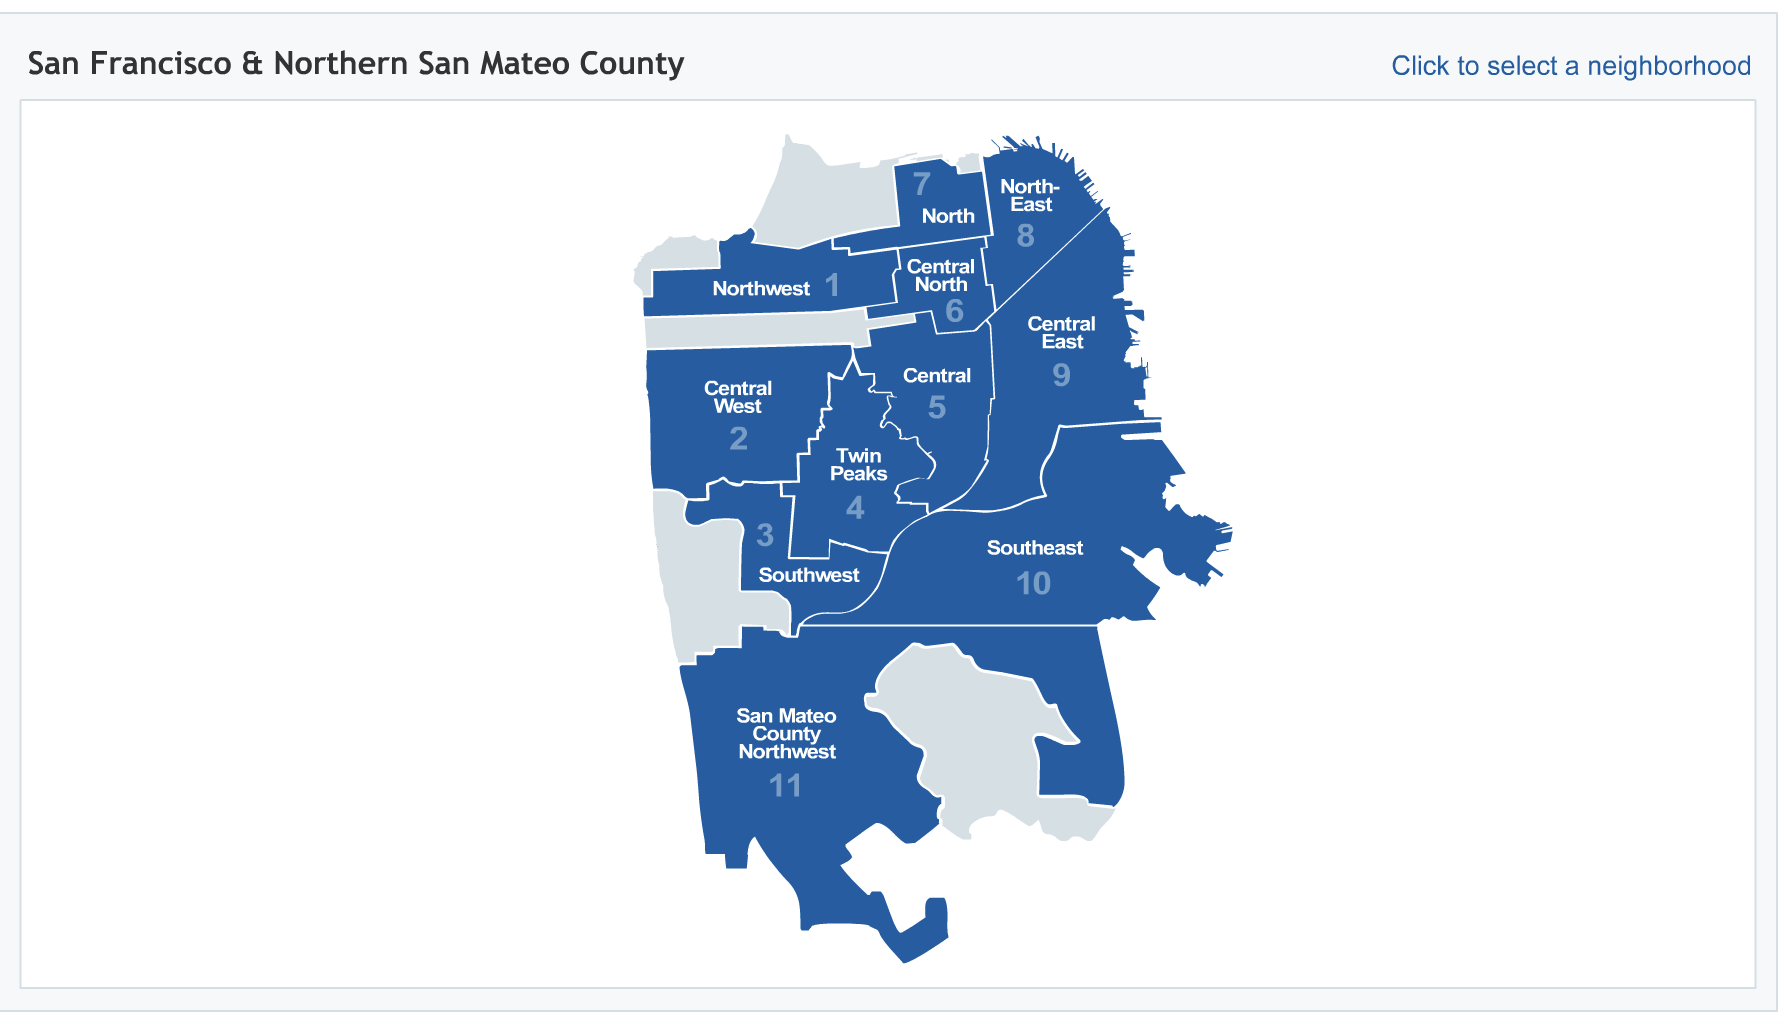

In [68]:
Image("img/SFAR_map.png", width=900, height=800)

In [69]:
cl_locations = ['alamo square / nopa', 'bayview', 'bernal heights', 
               'castro / upper market', 'cole valley / ashbury hts','downtown / civic / van ness',
               'excelsior / outer mission','financial district','glen park','haight ashbury','hayes valley',
               'ingleside / SFSU / CCSF','inner richmond','inner sunset / UCSF', 'laurel hts / presidio',
               'lower haight','lower nob hill','lower pac hts','marina / cow hollow','mission district',
               'nob hill','noe valley','north beach / telegraph hill','pacific heights','portola district',
               'potrero hill','richmond / seacliff', 'russian hill','SOMA / south beach','sunset / parkside',
               'tenderloin','treasure island','twin peaks / diamond hts','USF / panhandle','visitacion valley',
               'west portal / forest hill', 'western addition']

In [70]:
len(cl_locations)

37

In [71]:
hood_list = list(sf.hood.unique())

In [72]:
print("Number of unique neighborhoods provided: ", len(hood_list))
print("Number of NON-CL Hoods proviced: ", len(hood_list) - len(cl_locations))

Number of unique neighborhoods provided:  83
Number of NON-CL Hoods proviced:  46


In [73]:
extra_hoods = []

for hood in hood_list:
    if hood not in cl_locations:
        extra_hoods.append(hood)
        
print(extra_hoods)        

[nan, 'Curtis Park (Heart of Sacramento)', 'Mountain View', 'Golden Gate Heights, San Francisco', 'San Francisco/SunnySide', 'San Franciso Richmond District', 'brisbane', 'Mission Bay', 'Mission District', 'Bayview', 'CA', 'San Francisco, CA', '1365 McCandless Drive Milpitas, CA', 'NOPA', 'San Francisco', 'South Park', 'South Beach', 'Hayes Valley', 'Rincon Hill, San Francisco', 'Nob Hill', 'Rincon Hill', 'Cupertino', 'Lower Nob Hill', 'Pacific Heights', 'The Castro', 'North Beach', 'SoMa', 'Fremont', 'Civic Center, Downtown, Van Ness', 'Telegraph Hill', 'Marina District', 'Embarcadero / North Waterfront', 'Lawai, Poipu Adjacent', 'Glen Park', '2026 Beach St, Concord, CA', 'Vallejo', 'San Francisco North Waterfront', 'Daly City', 'Lower Pacific Heights', 'Westlake', 'North Panhandle', 'Eureka Valley', 'SAN FRANCISCO', 'SOMA', 'West Sacramento', 'South of Market', 'Marina']


Some of these neighborhood values are NOT in San Francisco, and so I'll ignore these. The rest will be mapped below using the `sf_map_dict`. 

### Create a dictionary to set neighborhoods to district keys

In [74]:
sf_map_dict = {1: ['inner richmond', 'richmond / seacliff', 'San Franciso Richmond District' 
               ],
           2: ['inner sunset / UCSF', 'sunset / parkside', 'Golden Gate Heights, San Francisco' 
              ], 
           3: ['ingleside / SFSU / CCSF' 
              ], 
           4: ['twin peaks / diamond hts', 'west portal / forest hill', 'San Francisco/SunnySide'
              ], 
           5: ['alamo square / nopa', 'castro / upper market', 'cole valley / ashbury hts', 
               'glen park', 'haight ashbury', 'noe valley', 'The Castro', 'Glen Park',
               'North Panhandle', 'Eureka Valley' 
              ], 
           6: ['hayes valley', 'lower haight', 'USF / panhandle', 'western addition', 
              'NOPA', 'Hayes Valley', 'Lower Pacific Heights'
              ], 
           7: ['laurel hts / presidio', 'lower pac hts', 'marina / cow hollow', 'pacific heights',
              'Pacific Heights', 'Marina District', 'Marina'
              ], 
           8: ['downtown / civic / van ness', 'financial district', 'lower nob hill', 'nob hill', 
              'north beach / telegraph hill', 'russian hill', 'tenderloin', 'Nob Hill', 'Lower Nob Hill', 
               'North Beach', 'Civic Center, Downtown, Van Ness', 'Telegraph Hill', 
               'Embarcadero / North Waterfront', 'San Francisco North Waterfront' 
              ], 
           9: ['bernal heights', 'mission district', 'potrero hill', 'SOMA / south beach', 
              'Mission Bay', 'Mission District', 'South Park', 'South Beach', 'Rincon Hill, San Francisco', 
              'Rincon Hill', 'SoMa', 'SOMA', 'South of Market' 
              ], 
           10: ['bayview', 'excelsior / outer mission', 'portola district', 
                'visitacion valley', 'Bayview' 
               ]
           }

In [75]:
sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,in-unit,no-pets,multi,protected
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,in-unit,both,multi,protected
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,in-unit,both,multi,n/a
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,n/a,both,multi,n/a


In [76]:
def set_hood_district(hood):
    for dist, hood_list in sf_map_dict.items():
        if hood in hood_list:
            return dist

In [77]:
sf['hood_district'] = sf['hood'].apply(lambda x: set_hood_district(x))

In [78]:
sf.head(15)

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,in-unit,no-pets,multi,protected,7.0
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,in-unit,both,multi,protected,7.0
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,in-unit,both,multi,n/a,7.0
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected,7.0
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,n/a,both,multi,n/a,7.0
1978,#168 Furnished&unfurnished - 2 Bdrm 1 Bath in ...,3800,800.0,2.0,1.0,SOMA / south beach,on-site,cats,multi,protected,9.0
2099,#185 Furnished ONLY Spacious 1 bedroom in Russ...,3100,750.0,1.0,1.0,russian hill,in-unit,no-pets,multi,protected,8.0
2092,#201 Furnished ONLY Charming 1 bedroom enjoy s...,3000,650.0,1.0,1.0,laurel hts / presidio,on-site,both,multi,n/a,7.0
2091,#202 Furnished ONLY One bedroom one bath in La...,3000,650.0,1.0,1.0,laurel hts / presidio,on-site,both,multi,protected,7.0
2014,#210 Modern Jr. 1bd/1ba located by Caltrain w/...,3200,650.0,1.0,1.0,SOMA / south beach,in-unit,cats,multi,protected,9.0


### Dropping remaining rows with missing values

In [79]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 1980 to 225
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1076 non-null   object 
 1   price          1076 non-null   int64  
 2   sqft           1076 non-null   float64
 3   beds           1076 non-null   float64
 4   bath           1076 non-null   float64
 5   hood           1057 non-null   object 
 6   laundry        1076 non-null   object 
 7   pets           1076 non-null   object 
 8   housing_type   1076 non-null   object 
 9   parking        1076 non-null   object 
 10  hood_district  1025 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 140.9+ KB


In [80]:
sf = sf[sf['hood_district'].notna()]

In [81]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 1980 to 225
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1025 non-null   object 
 1   price          1025 non-null   int64  
 2   sqft           1025 non-null   float64
 3   beds           1025 non-null   float64
 4   bath           1025 non-null   float64
 5   hood           1025 non-null   object 
 6   laundry        1025 non-null   object 
 7   pets           1025 non-null   object 
 8   housing_type   1025 non-null   object 
 9   parking        1025 non-null   object 
 10  hood_district  1025 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 96.1+ KB


## Outliers


Before exporting a clean file, I'll do a search for outliers, and refer back to the Craigslist posting to see if they're legitimate. 

In [82]:
sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,in-unit,no-pets,multi,protected,7.0
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,in-unit,both,multi,protected,7.0
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,in-unit,both,multi,n/a,7.0
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected,7.0
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,n/a,both,multi,n/a,7.0


In [83]:
sf.describe()

,price,sqft,beds,bath,hood_district
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,3602.549268,1146.560000,1.647805,1.387805,7.075122
std,1645.164943,1127.275597,1.083369,0.565614,2.390414
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4210.000000,1250.000000,2.000000,2.000000,9.000000
max,22500.000000,11020.000000,6.000000,4.000000,10.000000


### Price

From the table above, we see that our 75 percentile for price is just over 4k, but our max is over 22k. That seems high. I'll do a search for anything above 10k and check the links to see if they're mistakenly listed.

In [84]:
high_price_sf = sf[sf.price > 10000]

In [85]:
high_price_sf

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
2085,#500 Furnished Only NEWLY REMODELED LUXURY 4 B...,15000,3500.0,4.0,3.5,richmond / seacliff,in-unit,no-pets,single,protected,1.0
1933,Amenities & Gym Open | Water Views | 3 Bed 3.5...,19000,2358.0,3.0,3.5,SOMA / south beach,in-unit,no-pets,multi,valet,9.0
1203,Looking for Luxury? Try 33 Tehama! High-Rise L...,12500,2250.0,2.0,2.5,SOMA / south beach,in-unit,both,multi,valet,9.0
1270,Rarely Available w Parking & Yard!!,10500,2179.0,3.0,3.0,russian hill,in-unit,no-pets,multi,protected,8.0
2332,Tri-Level Penthouse Loft w/ Private Roof Deck ...,12000,3300.0,4.0,4.0,SOMA / south beach,in-unit,both,multi,protected,9.0
1926,Warehouse Conversion | Garden Rooftop | Multip...,22500,4509.0,3.0,4.0,SOMA / south beach,in-unit,no-pets,multi,protected,9.0


Six listings in the dataset above 10k/month. I'll use the `sf_raw` dataframe to grab the links and investigate.

In [86]:
high_prices = sf_raw[sf_raw.price > 10000]

In [87]:
len(high_prices)

16

In [88]:
high_prices.describe()

,price,brs,sqft
count,16.000000,16.000000,8.000000
mean,17530.562500,3.375000,3262.000000
std,6163.095034,0.885061,903.693532
min,10500.000000,2.000000,2179.000000
25%,12375.000000,3.000000,2331.000000
50%,16995.000000,3.000000,3400.000000
75%,19875.000000,4.000000,4000.000000
max,29000.000000,5.000000,4509.000000


Amazingly enough, 22.5k was not our actual max in the raw data! I must have dropped some for other missing data fields. 

In [89]:
high_prices.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
293,Oct 1,Two-story luxury penthouse condo. Great locati...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,11999,3.0,NaN,north beach / telegraph hill,2.5Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
626,Oct 1,"Stunning Dolores Park Penthouse - Views, 3 Car...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,12500,3.0,NaN,Mission Dolores,3Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
665,Oct 1,Prime Pacific Heights House-Like Two-Level Condo,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,12000,3.0,NaN,pacific heights,3Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
780,Oct 1,"Grand Mansion in Cole Valley, Private Yard, 2 ...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,17000,5.0,NaN,inner sunset / UCSF,5.5Ba,['application fee details: $40.00 per applican...
781,Oct 1,"Grand Mansion in Cole Valley, Private Yard, 2 ...",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,17000,5.0,NaN,cole valley / ashbury hts,5.5Ba,['application fee details: $40.00 per applican...


I'll take a quick look at the 22.5k max from the cleaned dataframe. 

In [90]:
price_22500 = high_prices[high_prices.price == 22500]

In [91]:
price_22500

,date,title,link,price,brs,sqft,hood,bath,amenities
1926,Oct 1,Warehouse Conversion | Garden Rooftop | Multip...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,22500,3.0,4509.0,SOMA / south beach,4Ba,['application fee details: $45 Application Fee...


That is 100% real, and over 200% of what I pay for rent in Oakland. Amazing. 

Let's look at the other listings: 

In [92]:
#for link in high_prices.link:
#    print(link, '\n')

These all appear to be real as well - unreal. I can't imagine being able to afford a +20k/month rental in SF and using *Craigslist* as my search tool, but here we are.

They'll remain in the data set.

### Square Footage


I'm kind of afraid to look, but let's check square footage for anything above 5k sqft.

In [93]:
high_sqft_sf = sf[sf.sqft > 5000]

In [94]:
len(high_sqft_sf)

17

In [95]:
high_sqft_sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
554,"Beautiful Studio, Ready to Rent! Move in special",2053,5100.0,0.0,1.0,western addition,in-unit,both,multi,protected,6.0
2672,"Furnished 1BR South Beach, w/ Balcony + Spa, n...",3590,6360.0,1.0,1.0,South Beach,on-site,both,multi,off-street,9.0
2764,"Furnished Airy Hayes Valley 2BR w/ Rooftop, Pa...",4890,9800.0,2.0,2.0,Hayes Valley,in-unit,both,multi,off-street,6.0
2670,"Furnished Bright Nob Hill Studio w/ Gym, Sauna...",3290,5200.0,0.0,1.0,Nob Hill,on-site,no-pets,multi,off-street,8.0
2746,"Furnished Bright Rincon Hill 1BR w/ Rooftop, S...",3690,5880.0,1.0,1.0,Rincon Hill,in-unit,both,multi,n/a,9.0


In [96]:
high_sqft = sf_raw[sf_raw.sqft > 5000]

In [97]:
# for link in high_sqft.link:
#     print(link, '\n')

These are wrong. Most of these listings are apartments that are 1,500 square feet at most. I'm guessing that some of these listings just have a 0 at the end where it shouldnt... for example, 7500 instead of 750.

I'll look at square footage above 3k (the 75 percentile is 1250) and less than 5k to see what's going on.

In [98]:
high_sqft_sf = sf[(sf.sqft > 3000) & (sf.sqft < 5000)]

In [99]:
len(high_sqft_sf)

21

In [100]:
high_sqft_sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected,7.0
2085,#500 Furnished Only NEWLY REMODELED LUXURY 4 B...,15000,3500.0,4.0,3.5,richmond / seacliff,in-unit,no-pets,single,protected,1.0
705,Elegant 5 Bedroom St Francis Wood home,9100,3200.0,5.0,3.0,west portal / forest hill,in-unit,no-pets,single,n/a,4.0
1848,"Fully Furnished, Ample Studio in South Park, n...",3090,4500.0,0.0,1.0,South Park,on-site,no-pets,multi,off-street,9.0
2739,"Furnished Cozy South Park Studio, near Caltrai...",2890,4250.0,0.0,1.0,South Park,in-unit,no-pets,multi,n/a,9.0


In [101]:
high_sqft_sf.describe()

,price,sqft,beds,bath,hood_district
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,5640.238095,4311.857143,1.095238,1.666667,7.428571
std,5291.613761,592.677339,1.813967,1.121755,2.203893
min,1990.000000,3200.000000,0.000000,1.000000,1.000000
25%,2690.000000,4160.000000,0.000000,1.000000,6.000000
50%,3090.000000,4509.000000,0.000000,1.000000,8.000000
75%,7995.000000,4700.000000,3.000000,2.500000,9.000000
max,22500.000000,4970.000000,5.000000,4.000000,9.000000


In [102]:
high_sqft = sf_raw[(sf_raw.sqft > 3000) & (sf_raw.sqft < 5000)]

In [103]:
len(high_sqft)

23

In [104]:
# for link in high_sqft.link:
#     print(link, '\n')

A fair amount of these still look wrong. There's a few that are probably correct, but I'm seeing a lot of studios and 1-2 bedrooms that claim to be +4000 sqft, but they're obviously not when looking at the floor plan and photos. 

I think a reasonable cut off then is 4000. Anything above this threshhold will be dropped.

In [105]:
sf = sf[sf.sqft < 4000]

In [106]:
sf.describe()

,price,sqft,beds,bath,hood_district
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,3587.469758,974.319556,1.677419,1.390625,7.044355
std,1550.004042,475.989720,1.075727,0.563239,2.412975
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4218.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


What about these low sqft apartments? 

In [107]:
low_sqft_sf = sf[sf.sqft < 250]

In [108]:
low_sqft_sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
529,"$1,200 - Inner Richmond, two blocks away from ...",1200,184.0,1.0,2.5,inner richmond,n/a,no-pets,multi,n/a,1.0
2879,1 Bed 1 Bath Private Studio,750,170.0,1.0,1.0,excelsior / outer mission,on-site,no-pets,multi,n/a,10.0
1846,2 Months Off! Studio Available Now!,1691,232.0,0.0,1.0,SOMA / south beach,on-site,no-pets,multi,protected,9.0
1849,2 Months Off! Studio Available Now!,1660,232.0,0.0,1.0,SOMA / south beach,on-site,no-pets,multi,protected,9.0
1830,2 Months Off! Studio Available Now!,1690,233.0,0.0,1.0,SOMA / south beach,on-site,no-pets,multi,protected,9.0


In [109]:
len(low_sqft_sf)

13

In [110]:
low_sqft_index = list(low_sqft_sf.index)

In [111]:
low_sqft_index

[529, 2879, 1846, 1849, 1830, 1728, 196, 664, 505, 419, 1185, 331, 2923]

In [112]:
# for link in sf_raw.iloc[low_sqft_index].link:
#     print(link, '\n')

The following indexes are shared housing arrangements and should be dropped: 529, 664, 1185

In [113]:
sf.drop([529, 664, 1185], inplace=True)

In [114]:
sf.head()

,title,price,sqft,beds,bath,hood,laundry,pets,housing_type,parking,hood_district
1980,"#107 Furnished Only Heaven by Views, Luxury, S...",6800,1600.0,2.0,2.0,pacific heights,in-unit,no-pets,multi,protected,7.0
2018,"#120 Furnished ONLY Gorgeous, Cozy Junior-One-...",3500,550.0,1.0,1.0,pacific heights,in-unit,both,multi,protected,7.0
2095,#125 FURNISHED ONLY Beautiful 2BR in Marina,5100,1300.0,2.0,1.0,marina / cow hollow,in-unit,both,multi,n/a,7.0
2015,#132 Furnished ONLY Beautiful Mansion in Heart...,9000,3500.0,3.0,2.5,pacific heights,in-unit,no-pets,multi,protected,7.0
2013,#158 Furnished ONLY Jr 1 bedroom w/ Parking at...,3100,561.0,1.0,1.0,marina / cow hollow,n/a,both,multi,n/a,7.0


In [115]:
sf.describe()

,price,sqft,beds,bath,hood_district
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293,7.052578
std,1546.222670,474.629798,1.076710,0.562714,2.404716
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4242.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


The rest of this looks correct. Now to clean up the columns and export to a csv.

## Final Formatting and Export

In [116]:
sf_clean = sf[['price', 'sqft', 'beds', 'bath', 'laundry', 'pets', 'housing_type', 'parking', 'hood_district']].reset_index(drop=True)

In [117]:
sf_clean.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,in-unit,no-pets,multi,protected,7.0
1,3500,550.0,1.0,1.0,in-unit,both,multi,protected,7.0
2,5100,1300.0,2.0,1.0,in-unit,both,multi,n/a,7.0
3,9000,3500.0,3.0,2.5,in-unit,no-pets,multi,protected,7.0
4,3100,561.0,1.0,1.0,n/a,both,multi,n/a,7.0


In [118]:
sf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 69.7+ KB


In [119]:
sf_clean.describe()

,price,sqft,beds,bath,hood_district
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293,7.052578
std,1546.222670,474.629798,1.076710,0.562714,2.404716
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4242.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


In [120]:
sf_clean.to_csv('data_files/sf_clean.csv', index=False)